# Forecasting

## Loading Libraries and datasets

In [211]:
# Importing data analytics libraries
import pandas as pd
import numpy as np

In [212]:
# Importing visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Setting parameters for plot fig size
plt.rcParams["figure.figsize"] = (20,8)

In [213]:
# Importing performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
0,2013-01-01,0,2,991,1.0,1,2013,1,67,True
1,2013-01-01,0,2,1472,1.0,1,2013,1,23,True
2,2013-01-01,0,2,1905,1.0,1,2013,1,30,True
3,2013-01-01,0,2,2920,2.0,1,2013,1,21,True
4,2013-01-01,0,2,3320,1.0,1,2013,1,19,True


In [214]:
# Reading the cleaned and feature-engineered test dataset
df_test = pd.read_csv('../competitive-data-science-final-project/sales_test_with_target.csv')

In [215]:
# Reading the cleaned and feature-engineered train dataset
df = pd.read_csv('../competitive-data-science-final-project/new_sales_train.csv')

In [216]:
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
0,2013-01-01,0,2,991,1.0,1,2013,1,67,True
1,2013-01-01,0,2,1472,1.0,1,2013,1,23,True
2,2013-01-01,0,2,1905,1.0,1,2013,1,30,True
3,2013-01-01,0,2,2920,2.0,1,2013,1,21,True
4,2013-01-01,0,2,3320,1.0,1,2013,1,19,True


In [217]:
df.tail()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
2882303,2015-09-30,32,59,15069,1.0,9,2015,2,28,False
2882304,2015-09-30,32,59,15255,1.0,9,2015,2,63,False
2882305,2015-09-30,32,59,15256,2.0,9,2015,2,63,False
2882306,2015-09-30,32,59,16184,1.0,9,2015,2,65,False
2882307,2015-09-30,32,59,22088,1.0,9,2015,2,83,False


## Grouping the dataframes to get one row each for the measured time unit

In [218]:
# Grouping by date_block_num to get monthly item_cnt_day sum
df_monthly = df.groupby(df.date_block_num)[["item_cnt_day"]].sum()
df_monthly.tail()

,item_cnt_day
date_block_num,
28,72295.0
29,64114.0
30,63187.0
31,66079.0
32,72843.0


In [219]:
# Grouping the test data - Monthly
df_monthly_test = df_test.groupby(df_test.date_block_num)[["item_cnt_day"]].sum()

In [220]:
# Grouping by date to get daily item_cnt_day sum
df_daily = df.groupby(df.date)[["item_cnt_day"]].sum()
df_daily.tail()

,item_cnt_day
date,
2015-09-26,3075.0
2015-09-27,2818.0
2015-09-28,2275.0
2015-09-29,4209.0
2015-09-30,4068.0


In [221]:
# Grouping the test data - Daily
df_daily_test = df_test.groupby(df_test.date)[["item_cnt_day"]].sum()
df_daily_test.tail()

,item_cnt_day
date,
2015-10-27,1551.0
2015-10-28,3593.0
2015-10-29,1589.0
2015-10-30,2274.0
2015-10-31,3104.0


## **Cheking for any missing dates**

In [222]:
dates_df = df_daily.copy()

# Setting the Date values as index
#dates_df = dates_df.set_index('date')
 
# to_datetime() method converts string
# format to a DateTime object
#dates_df.index = pd.to_datetime(dates_df.index)
 
# dates which are not in the sequence
# are returned
print(pd.date_range(
  start="2013-01-01", end="2015-09-30").difference(dates_df.index))

# No missing dates

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


# 1. Pandas moving average - grouped by month

In [223]:
# Making a copy of the data frame
df_monthly_train = df_monthly.copy()

In [224]:
# Adding rolling average column for 3 day rolling average
df_monthly_train["rolling_av3"] = df_monthly_train["item_cnt_day"].rolling(3).mean().round(2)
df_monthly_train.tail()
#mean_squared_error(df_monthly_train.item_cnt_day[2:-1], df_monthly_train.rolling_av3[2:-1])

,item_cnt_day,rolling_av3
date_block_num,,
28,72295.0,77378.67
29,64114.0,71412.00
30,63187.0,66532.00
31,66079.0,64460.00
32,72843.0,67369.67


In [225]:
# Adding the rolling average of month 32 as the actual for month 33 to predict the average for month 33 
df_monthly_train.loc[len(df_monthly_train)] = [df_monthly_train.rolling_av3[32], " "]
df_monthly_train.tail()

,item_cnt_day,rolling_av3
date_block_num,,
29,64114.00,71412.0
30,63187.00,66532.0
31,66079.00,64460.0
32,72843.00,67369.67
33,67369.67,


In [226]:
df_monthly_train.head()

,item_cnt_day,rolling_av3
date_block_num,,
0,131478.0,NaN
1,128090.0,NaN
2,147142.0,135570.0
3,107190.0,127474.0
4,106970.0,120434.0


In [227]:
# Predicting the rolling average for month 33 in a seperate column
df_monthly_train["rolling_av3_1"] = df_monthly_train["item_cnt_day"].rolling(3).mean().round(2)
df_monthly_train.tail()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
29,64114.00,71412.0,71412.00
30,63187.00,66532.0,66532.00
31,66079.00,64460.0,64460.00
32,72843.00,67369.67,67369.67
33,67369.67,,68763.89


In [228]:
df_monthly_train.head()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
0,131478.0,NaN,NaN
1,128090.0,NaN,NaN
2,147142.0,135570.0,135570.0
3,107190.0,127474.0,127474.0
4,106970.0,120434.0,120434.0


In [229]:
# Replacing the item_cnt_day value for month 33 with test data and calculating the MSE and MAE
actual_val = float(df_monthly_test.item_cnt_day.iloc[0])
#df.at['C', 'x'] = 10
df_monthly_train.at[33,"item_cnt_day"] = actual_val
df_monthly_train.tail()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
29,64114.0,71412.0,71412.00
30,63187.0,66532.0,66532.00
31,66079.0,64460.0,64460.00
32,72843.0,67369.67,67369.67
33,71056.0,,68763.89


In [231]:
df_monthly_train.head()

,item_cnt_day,rolling_av3,rolling_av3_1
date_block_num,,,
0,131478.0,NaN,NaN
1,128090.0,NaN,NaN
2,147142.0,135570.0,135570.0
3,107190.0,127474.0,127474.0
4,106970.0,120434.0,120434.0


In [232]:
#mean squared error (y_true, y_pred)
mean_squared_error(df_monthly_train.item_cnt_day[2:], df_monthly_train.rolling_av3_1[2:])

234418077.64107814

In [233]:
#mean_absolute_error(y_true, y_pred)
mean_absolute_error(df_monthly_train.item_cnt_day[2:], df_monthly_train.rolling_av3_1[2:])

10567.1390625

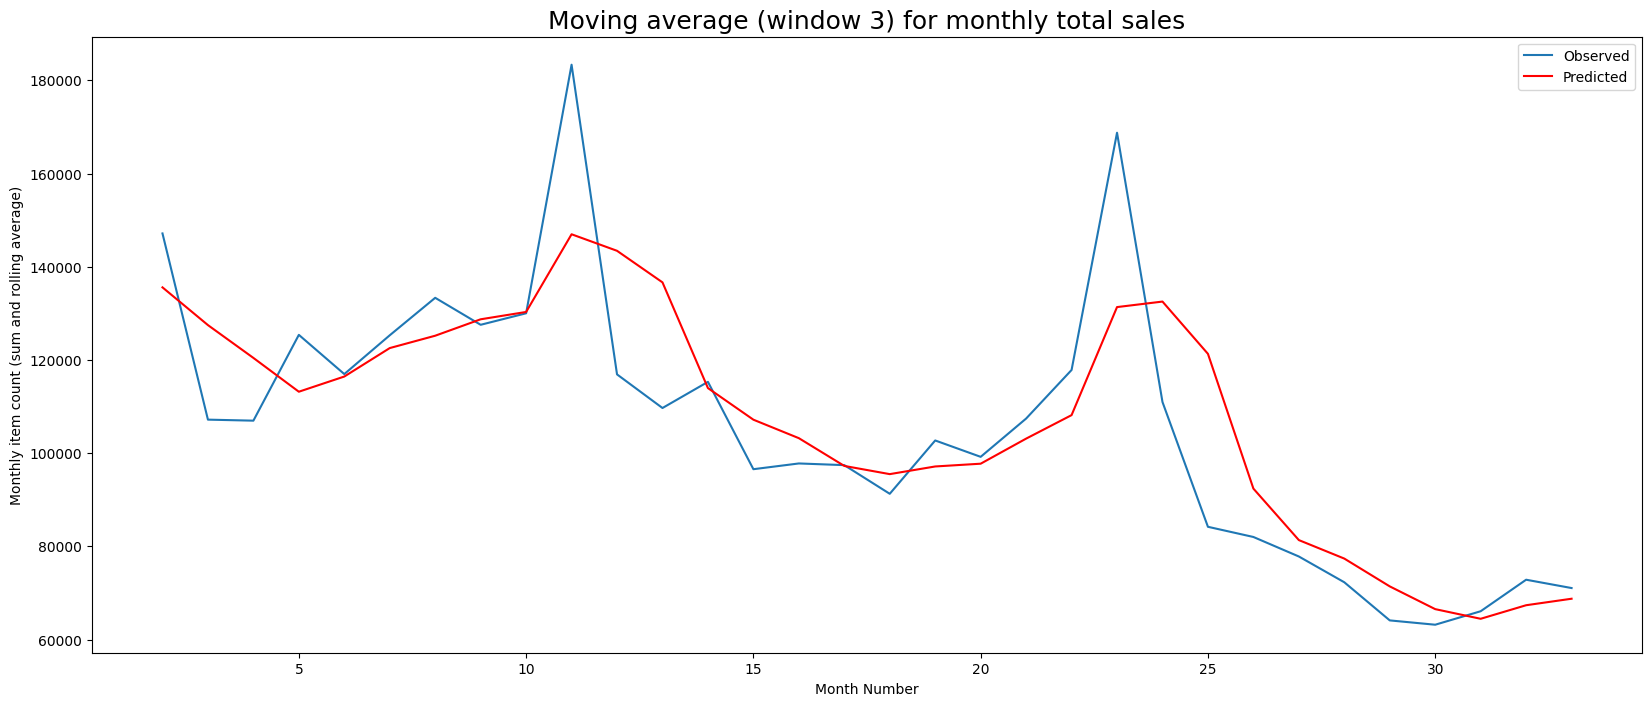

In [252]:
plt.plot(df_monthly_train.item_cnt_day[2:])
plt.plot(df_monthly_train.rolling_av3_1[2:], color='red')
plt.title("Moving average (window 3) for monthly total sales",
         fontsize = 18)
plt.xlabel("Month Number")
plt.ylabel("Monthly item count (sum and rolling average)")
plt.legend(["Observed", "Predicted"])
plt.show()

# 2. ARMA - 3 - day Moving average - Grouped by date

In [195]:
#Referenec : https://www.kaggle.com/code/carlmcbrideellis/time-series-a-simple-moving-average-ma-model